# Sentiment Analysis Across Movies Scripts


#### The goal of this project is to build emotional arcs for movie-scripts using sentiment analysis.

#### We will compare each movie's script with the VAD lexicon to extract the Valence Arousal and Dominance values of each word, 





#### And then we will visualize each movie's emotions in a line graph.

### Importing Libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import os
from nltk.corpus import stopwords
from nltk import word_tokenize
import string

### Reading The NRC-VAD Lexicon

In [17]:
VAD = pd.read_csv('VAD.txt',names=["Valence", "Arousal", "Dominance"], sep='\t')
VAD.head()

,Valence,Arousal,Dominance
aaaaaaah,0.479,0.606,0.291
aaaah,0.520,0.636,0.282
aardvark,0.427,0.490,0.437
aback,0.385,0.407,0.288
abacus,0.510,0.276,0.485


**- Adding extra stop words to remove from the Scripts**

In [18]:
english_stops = stopwords.words('english')
english_stops += list(string.punctuation)
english_stops += ['``', "''", "'s","'d","...","'","--"]
english_stops += list(string.digits)

**- Loading each script file and operating on it**

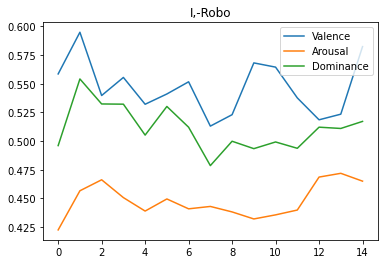

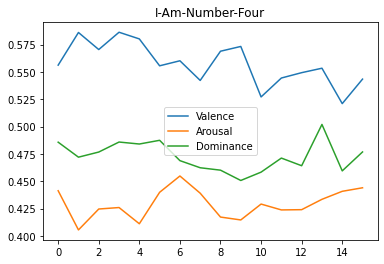

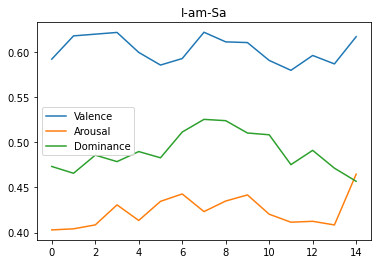

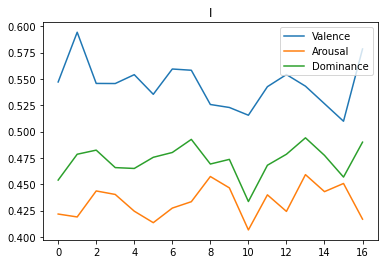

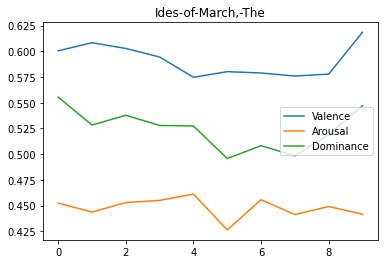

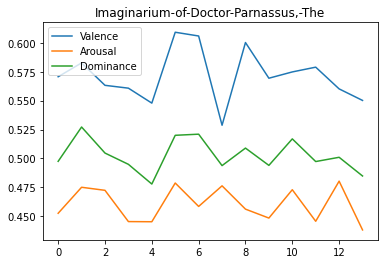

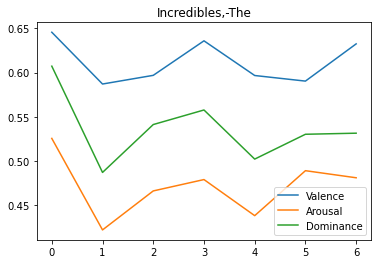

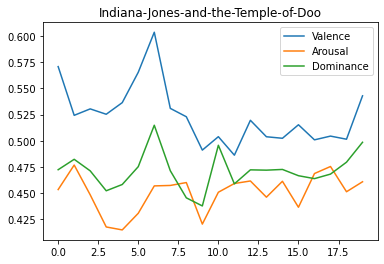

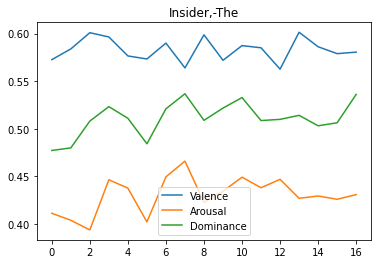

In [22]:
#Opening each script file to clean it 
for root, dirs, files in os.walk('scripts/'):
    for file in files: 
        with open(os.path.join(root,file),'r',encoding="utf8") as f:
            
            #dataframe to include each script's words and the corresponding values.
            Script = []
            Scriptdf = pd.DataFrame(columns = ['Valence',"Arousal","Dominance"])
            
            #tokenizing the words to remove white spaces and converting to lower cases
            words = word_tokenize(f.read())
            words = [word.lower() for word in words]
            
            #removing stopwords
            for word in words:
                if word not in english_stops: 
                    Script.append(word)
               
            #here we loop on every word in each script and put its corresponding value in the new dataframe
            c=0
            for word in Script:
   
                try:
                    Scriptdf.loc[c] = VAD.loc[word]
                    c+=1
                except Exception:
                    pass
 
            #we want to average the values of each 500 word so the graph is more cleaner
            Scriptdf = Scriptdf.groupby(np.arange(len(Scriptdf))//500).mean()
            Scriptdf.plot.line()
            
            filename = file.split('.')[0]
            plt.title(filename)
            
            #optionally we can save the graph locally
            #plt.savefig(filename+".jpg")       


### We can see for each movie's duration when exactly the emotion prevails, whether it is valence, arousal or dominance.

### This gives us a general look on the main emotion arcs of each movie.